In [1]:
import numpy as np
import pandas as pd

In [19]:
csv_data=pd.read_csv(r'C:\Users\tunah\OneDrive\Masaüstü\IBM Data Science\7)Data Visualization with Python\final\Topic_Survey_Assignment.csv')

In [20]:
csv_data

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [21]:
csv_data=csv_data.sort_values(by=["Very interested"],ascending=False)

In [22]:
csv_data

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [23]:
csv_data=csv_data/2233

In [24]:
csv_data=csv_data*100
csv_data=round(csv_data,2)

In [54]:
lst=list(csv_data.index)    

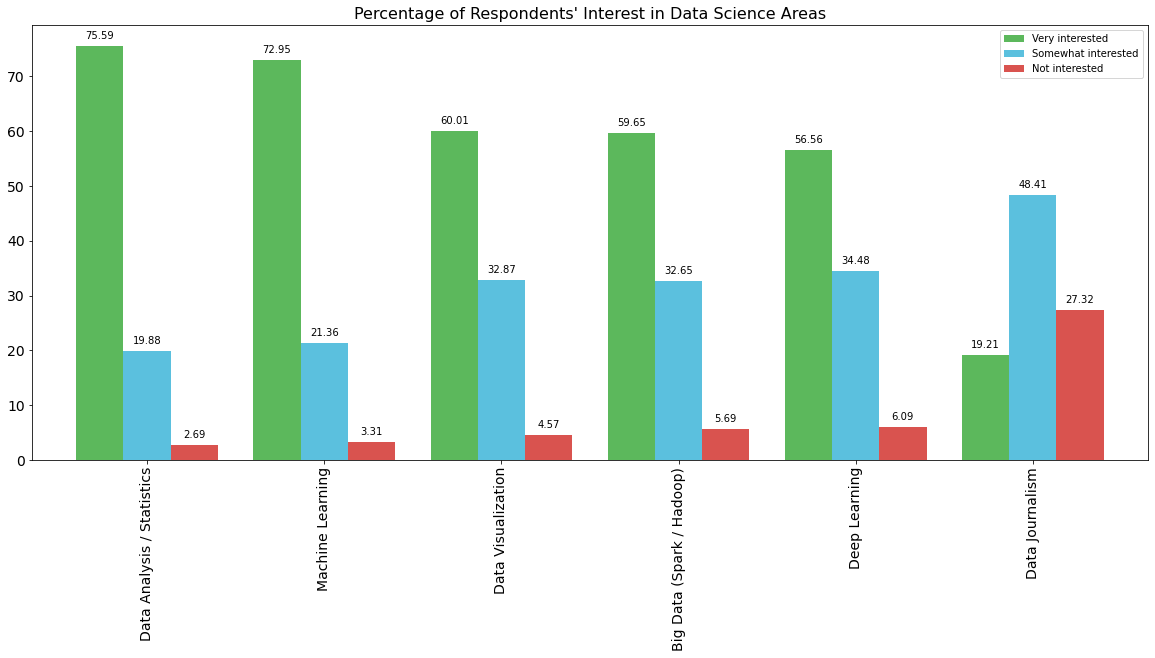

In [63]:
ax=csv_data.plot(kind='bar',figsize=(20,8),width=0.8,color=['#5cb85c','#5bc0de','#d9534f'],fontsize=14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize=16)


for i in ax.patches: 

    ax.annotate("%.2f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


plt.show()


In [65]:
police_data=pd.read_csv(r'C:\Users\tunah\OneDrive\Masaüstü\IBM Data Science\7)Data Visualization with Python\final\Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [68]:
police_data=police_data.groupby(['PdDistrict'],as_index=False).count()

In [74]:
police_data=police_data.loc[:,['PdDistrict','Category']]

In [78]:
police_data=police_data.rename(columns={"PdDistrict":"Neighborhood","Category":"Count"})

In [100]:
police_data

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [86]:
import json

with open(r'C:\Users\tunah\OneDrive\Masaüstü\IBM Data Science\7)Data Visualization with Python\final\san-francisco.geojson') as f:
  data1 = json.load(f)

# Output: {'name': 'Bob', 'languages': ['English', 'Fench']}
print(data1)

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'OBJECTID': 1, 'DISTRICT': 'CENTRAL', 'COMPANY': 'A'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-122.40532134644249, 37.806867516866724], [-122.40440122046421, 37.80885380837723], [-122.40438743872008, 37.80886519707406], [-122.40436730880846, 37.808872966044206], [-122.40434376667437, 37.808869624109605], [-122.40431429421082, 37.80881799170733], [-122.40394067997407, 37.80876198999871], [-122.40392016838871, 37.808754877186864], [-122.40390555965932, 37.808734021463344], [-122.40390814512642, 37.80871288836611], [-122.40471878715235, 37.80696905969842], [-122.4039597318324, 37.80657809724], [-122.4027673862454, 37.80801170771318], [-122.40274578869823, 37.80802322234157], [-122.40271771623641, 37.80802615647638], [-122.40269398350013, 37.80801537335998], [-122.40235483855216, 37.8078397060222], [-122.40234023023558, 3

In [89]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [102]:


# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(police_data['Count'].min(),
                              police_data['Count'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=data1,
    data=police_data,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
    reset=True
)
world_map

In [93]:
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=data,
    data=police_data,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
world_map